**Stock Price Prediction**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

Loading data

In [17]:
# Step 1: Load Data
data = pd.read_csv("/content/tesla.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

<ipython-input-17-0dab204cb888>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


Preprocess the data

In [4]:
# Step 2: Preprocess Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

Create Training Data

In [18]:
# Step 3: Create Training Data
prediction_days = 60
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Define and Train the model

In [23]:
# Step 4: Define the Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(prediction_days, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the Model
model.fit(x_train, y_train, epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0655
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0013
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0011
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0011
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 9.9312e-04
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 9.7795e-04
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 9.5578e-04
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 8.0258e-04
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 8.0376e-04
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 7.3721e-04
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 7.3175e-04
Epoch 12/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 7.2265e-04
Epoch 13/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 6.7617e-04
Epoch 14/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 6.4068e-04
Epoch 15/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 

Test the Model

In [27]:
# Step 5: Test the Model
test_data = scaled_data[-(prediction_days + len(data['Close'])):]  # Extend test data to ensure valid slicing

# Ensure there are enough data points for slicing
if len(test_data) < prediction_days:
    raise ValueError(f"test_data has less than {prediction_days} rows. Cannot create x_test.")

# Adjust prediction_days if necessary
prediction_days = min(prediction_days, len(test_data) - 1)
print(f"Using prediction_days: {prediction_days}")

# Create x_test
x_test = []
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i-prediction_days:i, 0])

# Check if x_test is empty
if len(x_test) == 0:
    print(f"test_data: {test_data}")
    raise ValueError("x_test is empty. Ensure sufficient rows in test_data and correct slicing logic.")

# Convert to NumPy array
x_test = np.array(x_test)
print(f"x_test shape (before reshape): {x_test.shape}")

# Reshape x_test
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

Using prediction_days: 58
x_test shape (before reshape): (2135, 58)
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


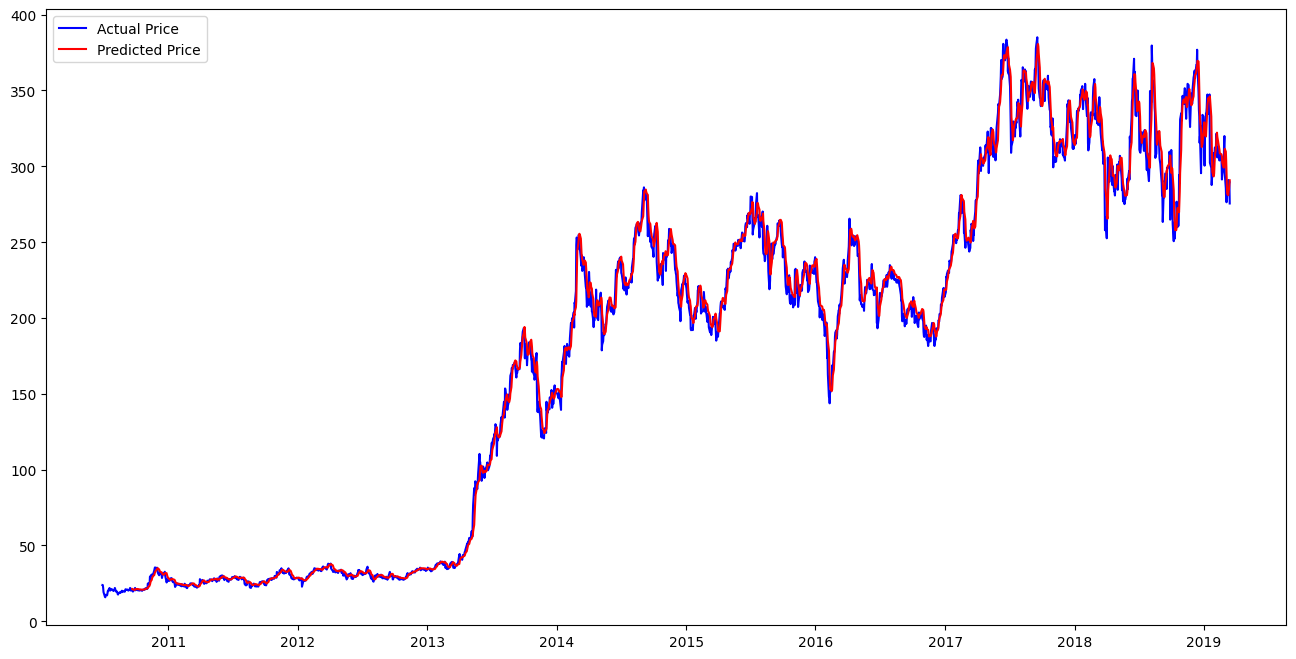

In [28]:
# Assuming x_test is a 2D array, we need to reshape it to 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Convert to 3D for LSTM

# Align predictions with actual data
prediction_range = range(len(data) - len(predictions), len(data))

plt.figure(figsize=(16, 8))
plt.plot(data['Close'], label="Actual Price", color='blue')
plt.plot(data.index[prediction_range], predictions, label="Predicted Price", color='red')
plt.legend()
plt.show()
